## Visualisations

NB: See **evaluation_experiments.ipynb** for the workflow of running the experiments.

This notebook visualises and does further processing on the results that were generated by evaluation_experiments.ipynb.

In [10]:
# Filepath used in evaluation_experiments.ipynb, from where the stored results will be read

# filepath = "30_May_hardmask_fidelities"
filepath = "25_May"

# Number of iterations run in evaluation_experiments.ipynb
big_loop_iterations = 10

# NB: thresholds are assumed to be 30 and 50.

1. Final values of each metric,  taking the average over all the iterations. 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(f"results_{filepath}/results_{filepath}.csv")
df_50 = df.loc[df['Threshold'] == 50]
mean_50 = df_50.mean()
df_30 = df.loc[df['Threshold'] == 30]
mean_30 = df_30.mean()

print("Min accuracy: ", df['Model accuracy'].min())
print("Median accuracy: ", df['Model accuracy'].median())
print("Max accuracy: ", df['Model accuracy'].max())

df.groupby(['Threshold']).mean()

Min accuracy:  60.0
Median accuracy:  65.625
Max accuracy:  77.5


,Iteration,Model accuracy,Samples,Fidelity score,Validity+ score,Validity- score,Sparsity score
Threshold,,,,,,,
30,4.5,66.875,10.0,0.8260,0.2325,0.84000,0.040138
50,4.5,66.875,10.0,0.8335,0.2925,0.84375,0.040138


2. Check the effect on RDT-fidelity when varying the sparsity of the explanation (i.e. using hard-mask where different percentages of nodes are selected as important)

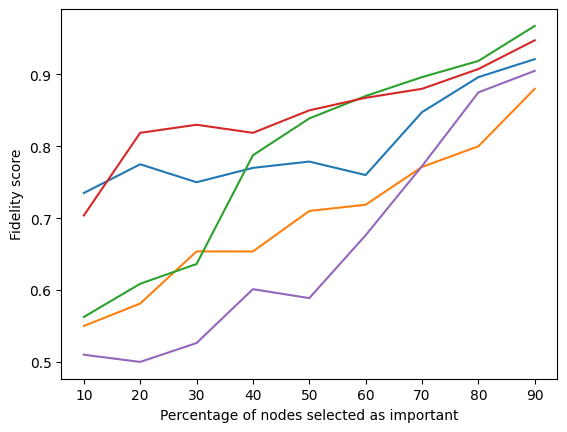

In [24]:
big_loop_iterations = 5
for i in range(big_loop_iterations):
    temp = df.loc[df["Iteration"] == i]
    plt.plot(temp["Threshold"], temp["Fidelity score"], label=temp["Model accuracy"].mean())
plt.xlabel('Percentage of nodes selected as important')
plt.ylabel('Fidelity score')
# plt.legend()
plt.show()


3. Investigating whether model accuracy has a correlation with the metric scores, indicating a possible bias in the metric.
Numbers below each plot show the correlation coefficient.

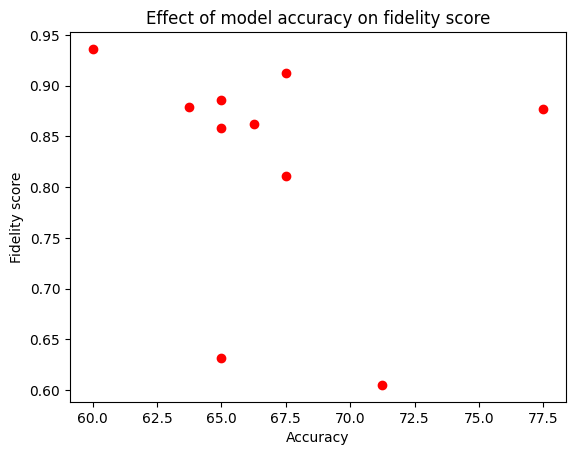

-0.2319981057427938
-0.1801496318478451


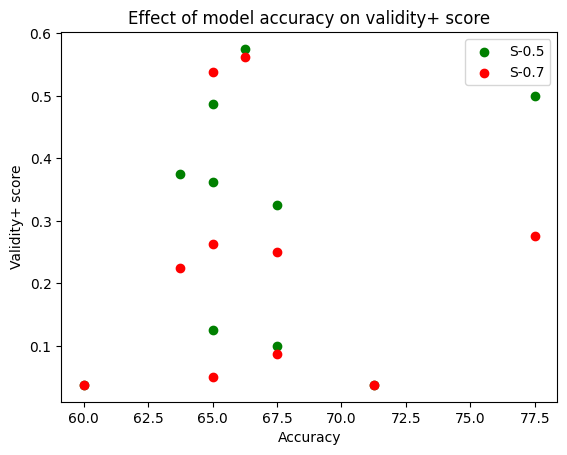

0.04760286755271701
0.24694176138471613


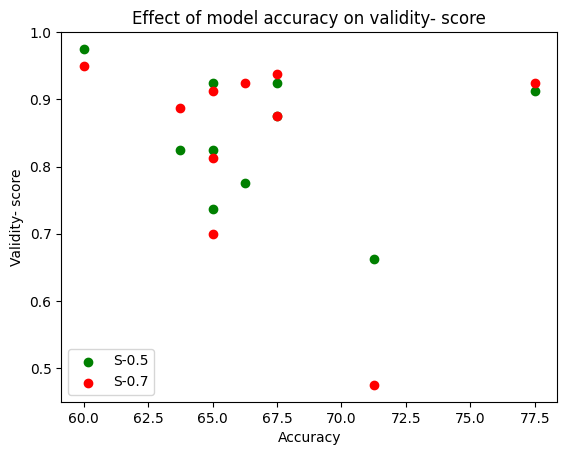

-0.2203459060788193
-0.17138449015874269


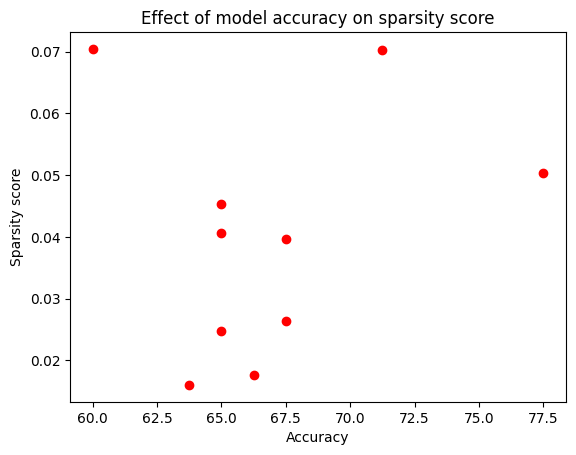

0.15690635293139027
0.15690635293139027


In [4]:
savefig = False
metrics = ["Fidelity score", "Validity+ score", "Validity- score", "Sparsity score"]

for m in metrics:
    if m.startswith("Val"):
        plt.scatter(df_50["Model accuracy"], df_50[m], c='green', label='S-0.5')
        plt.scatter(df_30["Model accuracy"], df_30[m], c='red', label = 'S-0.7')
        plt.legend()
    else:
        plt.scatter(df_30["Model accuracy"], df_30[m], c='red')
    plt.title(f'Effect of model accuracy on {m.lower()}')
    plt.title(f'Effect of model accuracy on {m.lower()}')
    plt.xlabel('Accuracy')
    plt.ylabel(m)

    if savefig:
        plt.savefig(f"../Research Paper/research paper/images/accuracy_Vs_{m}.jpg")
    plt.show()
    print(df_30["Model accuracy"].corr(df_30[m]))
    print(df_50["Model accuracy"].corr(df_50[m]))
    

### Extra analysis
4. Examining the confusion matrix of validity+ and validity- (i.e. how many graphs were originally class 0 but after averaging were predicted class 1, etc.)

In [5]:
import pandas as pd
df = pd.read_csv(f"results_{filepath}/validity_matrix_plus.csv")
df.sum()
# predicted 0, distorted 0 -> 00
# predicted 0, distorted 1 -> 01
# predicted 1, distorted 0 -> 10
# predicted 1, distored 1 -> 11

Iteration           90.0
Model accuracy    1337.5
Threshold          800.0
00                 654.0
01                 152.0
10                 268.0
11                 526.0
dtype: float64


5. Finding the number of fidelities that are 1 and 0, as opposed to other values:

In [6]:
thresholds = [30, 50]
for t in thresholds:
    combined_df = pd.DataFrame()
    for i in range(10):
        df = pd.read_csv(f"results/{i}_fidelities_10_samples_top_{t}.csv", header=None)
        combined_df = pd.concat([combined_df, df])
    print(f"At threshold {t}")
    vc = combined_df[0].value_counts(normalize=True)
    print(vc)

At threshold 30
0
1.0    0.59750
0.0    0.30375
0.8    0.02000
0.1    0.01625
0.9    0.01375
0.7    0.01125
0.5    0.01000
0.2    0.00875
0.3    0.00875
0.6    0.00625
0.4    0.00375
Name: proportion, dtype: float64
At threshold 50
0
1.0    0.60875
0.0    0.29750
0.1    0.02875
0.7    0.01250
0.3    0.01125
0.8    0.00875
0.6    0.00875
0.9    0.00750
0.2    0.00625
0.5    0.00625
0.4    0.00375
Name: proportion, dtype: float64


6. Examining the distribution of node importance values to interpret sparsity: if higher importance values occur more frequently, the explanation is dense. Ideally, a sparse explanation has low importance values that are very frequent and high importance values that are less frequent.

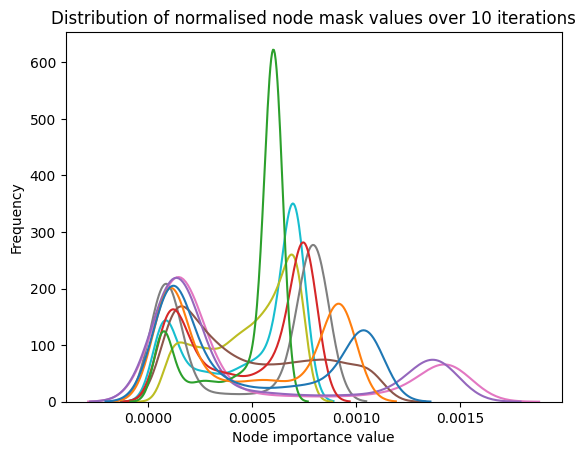

In [9]:
import seaborn as sns
import numpy as np
data = []
for i in range(big_loop_iterations):
    df = np.loadtxt(f"results_{filepath}/{i}_node_mask.csv")
    # Normalise
    df = df / df.sum()
    data.append(df)

# plt.hist(data, bins=30, stacked=True, edgecolor='black')

fig = sns.kdeplot(data, legend=False)
# plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlabel('Node importance value')
plt.ylabel('Frequency')
plt.title(f'Distribution of normalised node mask values over {big_loop_iterations} iterations')
plt.show()

Below code works only for visualising the node masks of the synthetic dataset! If reading KIRC data, visualises only the first 30 nodes.

In [ ]:
import seaborn as sns
import numpy as np
num_nodes = 50

# data = np.zeros((big_loop_iterations, 2049 ))
data = np.zeros((big_loop_iterations, num_nodes))
y = np.arange(num_nodes)
for i in range(big_loop_iterations):
    #x = np.loadtxt(f"results_{filepath}/{i}_node_mask.csv")
    x = np.loadtxt(f"results_{filepath}/{i}_node_mask.csv")
    # Normalise
    x = x / x.sum()
    x = x[0:num_nodes]
    plt.plot(y, x)
plt.xlabel('Node')
plt.ylabel('Importance value')
plt.show()
